In [2]:
%load_ext autoreload
%autoreload 2

import os, torch, click, numpy as np

import swyft
from utils import *
from plot import *

from tqdm import tqdm



DEVICE = 'cuda'


from torch import tensor

imkwargs = dict(extent=(-2.5, 2.5, -2.5, 2.5), origin='lower') #left, right, bottom, top

import matplotlib.colors
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.facecolor']='white'


In [3]:
preds = {}

for preds_name in os.listdir('../data/preds'):
    if preds_name.endswith('.npy'):
#         print(preds_name)
        
        with open( f'../data/preds/{preds_name}', 'rb') as f:
            
#             print(f)
            posts   = np.load(f)
            targets = np.load(f)
            inds    = np.load(f)
            obs0s   = np.load(f)
            
        pred = dict(posts = posts, targets = targets, inds = inds, obs0s = obs0s)
        
        preds[preds_name] = pred
        

In [4]:
keys = list(preds.keys())
keys

['UNet_M_m1_nsub5_nsim50000_nmbins3_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy',
 'UNet_M_m1_nsub3_nsim25000_nmbins4_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy',
 'UNet_M_m1_nsub1_nsim25000_nmbins1_lr-3.0_fac-1.0_pat5_nobs5000_PREDS.npy',
 'UNet_M_m1_nsub10_nsim100000_nmbins5_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy']

In [24]:
def get_title(title, m_titles):
    titles = np.array(np.copy(m_titles), dtype = object)
    titles[0] = title + "\n" +  m_titles[0]
    return titles

array(['UNet_M_m1_nsub5_nsim50000_nmbins3_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy',
       'UNet_M_m1_nsub3_nsim25000_nmbins4_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy',
       'UNet_M_m1_nsub10_nsim100000_nmbins5_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy'],
      dtype='<U75')

################# UNet_M_m1_nsub5_nsim50000_nmbins3_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


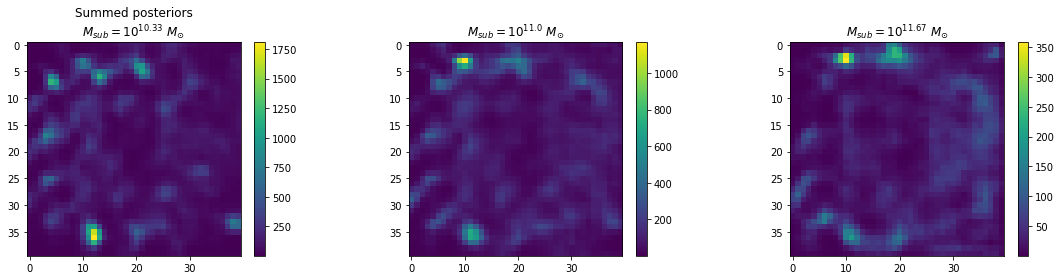

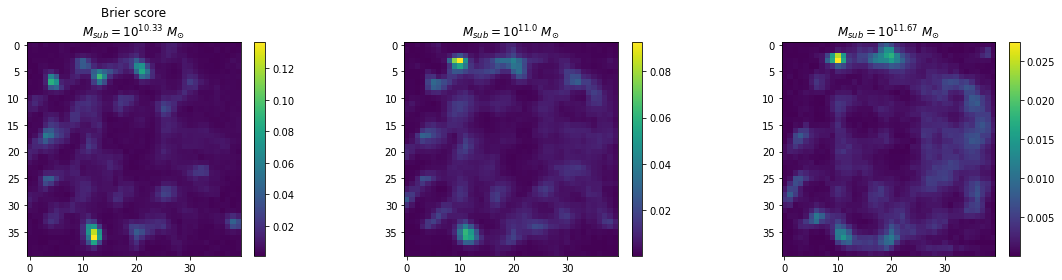

################# UNet_M_m1_nsub3_nsim25000_nmbins4_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


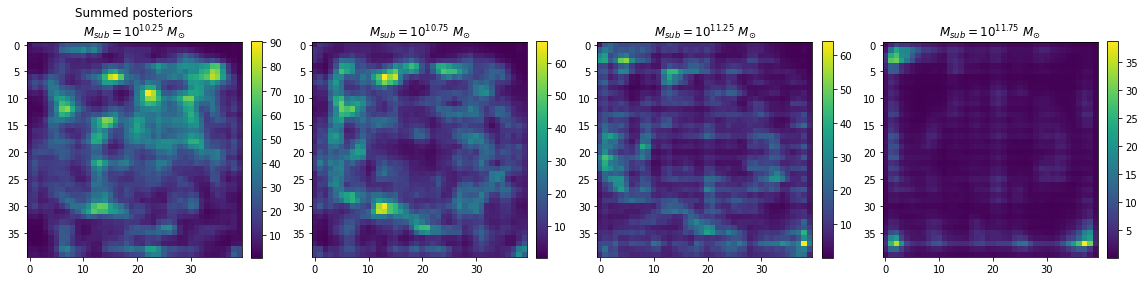

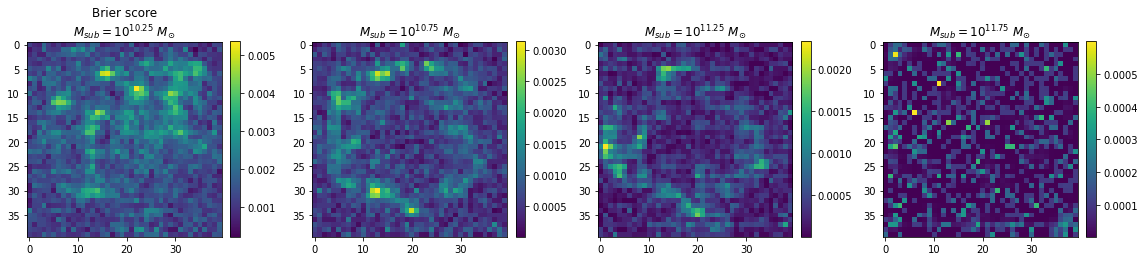

################# UNet_M_m1_nsub1_nsim25000_nmbins1_lr-3.0_fac-1.0_pat5_nobs5000_PREDS.npy ####################


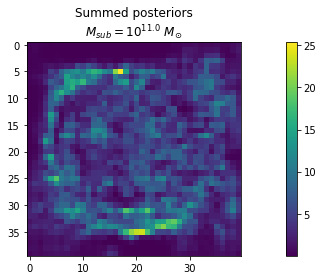

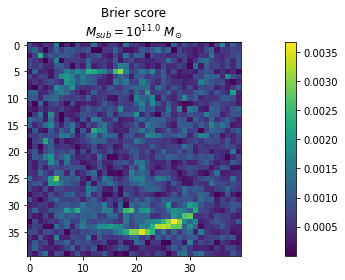

################# UNet_M_m1_nsub10_nsim100000_nmbins5_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


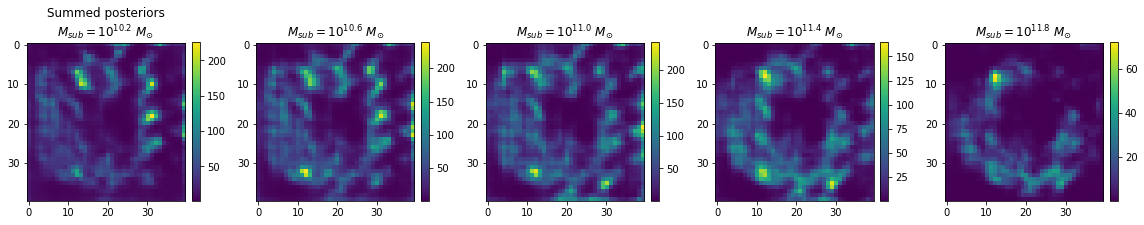

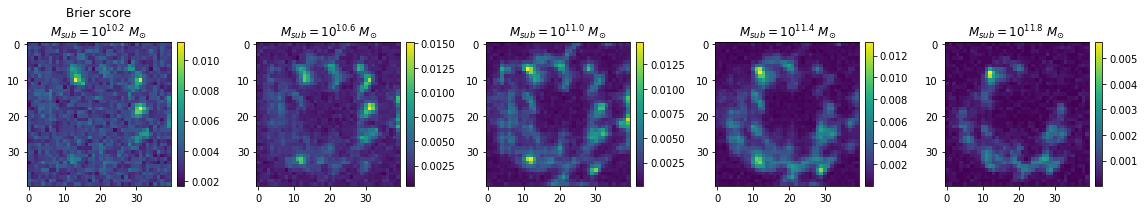

In [238]:
for key in keys:
# for key in np.take(keys, (0,1,3)):
# for key in [keys[0]]:
# for key in [keys[2]]:
    
    name = key
    posts   = preds[key]['posts']
    targets = preds[key]['targets']
    inds    = preds[key]['inds']
    obs0s   = preds[key]['obs0s']
    
#     k = np.ones((3, 3, 3))
#     posts_k = np.array([ndimage.convolve(post, k, mode='constant', cval=0.0) for post in posts])
#     targets_k = np.array([ndimage.convolve(target, k, mode='constant', cval=0.0) for target in targets])
    
    print(f'################# {name} ####################')
    
    n_obs = len(posts)
    
    nmbins = posts.shape[1]
    m = np.logspace(10, 12, 2*nmbins+1)
    m_centers, m_edges = m[1::2], m[0::2]
    m_titles = [rf'$M_{{sub}} = 10^{ {np.round(m, 2)} }\ M_{{\odot}}$' for m in np.log10(m_centers)]

    errs = posts - targets
    merr = np.sum(errs,    axis = 0) / n_obs
    rmsd = np.sqrt( np.sum((posts - targets)**2, axis = 0) / n_obs)
    brier   = np.sum((posts   - targets  )**2, axis = 0) / n_obs
    brier_k = np.sum((posts_k - targets_k)**2, axis = 0) / n_obs

    while rmsd[np.unravel_index(rmsd.argmax(), rmsd.shape)] > 0.99:
        max_index = np.unravel_index(rmsd.argmax(), rmsd.shape)
        print(rmsd[max_index], max_index)
        rmsd[max_index] = 0
        
    for i in np.random.randint(0, n_obs, 0):
        target_coords = np.array(np.where(targets[i] == 1)).T
        plt_imshow(posts[i], target_coords = target_coords, titles = get_title('Prediction', m_titles), y = 4, cbar = True, tl = True)
        

        
    targets_sum = np.sum(targets, axis = 0)
    posts_sum   = np.sum(posts,   axis = 0)

#     plt_imshow(targets_sum,  titles = m_titles, cbar = True)

    plt_imshow(posts_sum, titles = get_title('Summed posteriors', m_titles), cbar = True, tl = True, y = 4) 
#     plt_imshow(merr,  titles = get_title('Mean error', m_titles), cbar = True, tl = True) 
    plt_imshow(brier,  titles = get_title('Brier score', m_titles), cbar = True, tl = True, y = 4) 
#     plt_imshow(brier_k,  titles = get_title('Brier kernelised score', m_titles), cbar = True, tl = True, y = 4) 

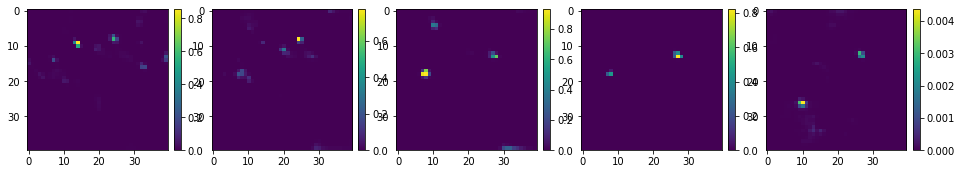

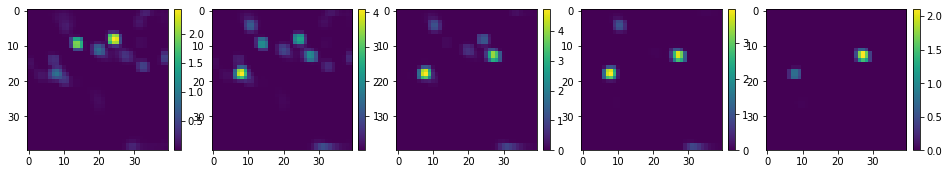

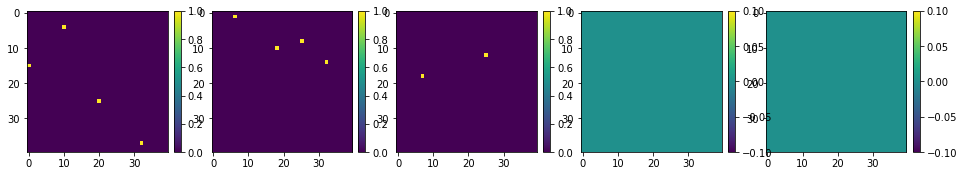

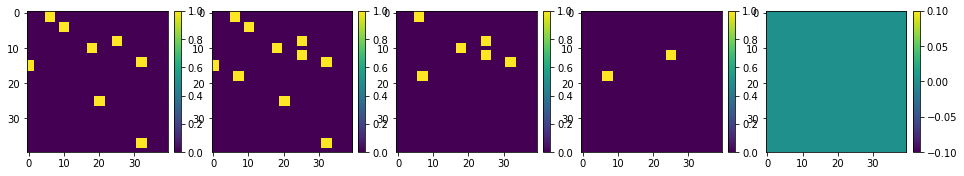

In [227]:
plots = [posts, posts_k, targets, targets_k]
for plot in plots:
    plt_imshow(plot[0], cbar = True)

In [217]:
posts_k = np.array([ndimage.convolve(post,m, mode='constant', cval=0.0) for post in posts])
targets_k = np.array([ndimage.convolve(target,m, mode='constant', cval=0.0) for target in targets])

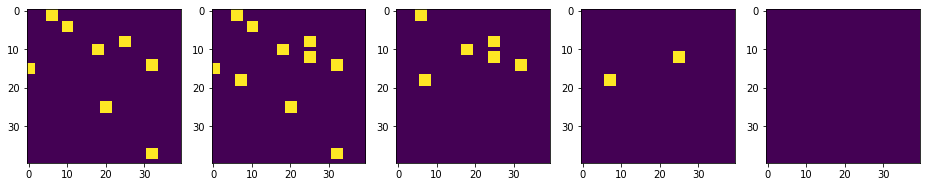

In [218]:
plt_imshow(targets_k[0])

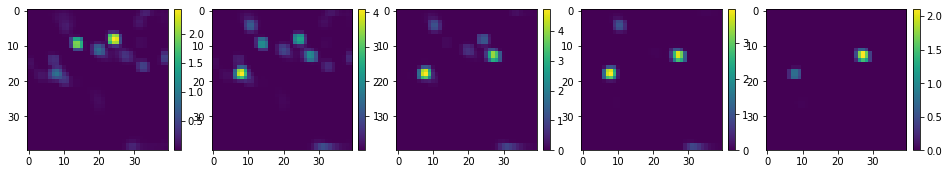

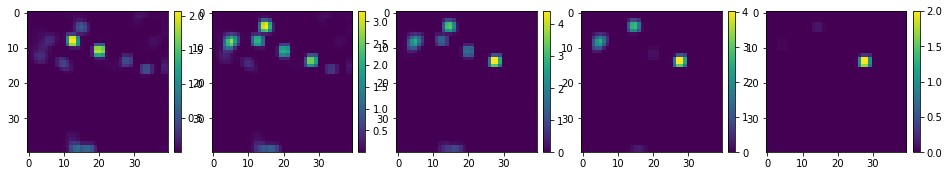

In [213]:
plt_imshow(ndimage.convolve(posts[0],m, mode='constant', cval=0.0), cbar = True)
plt_imshow(ndimage.convolve(posts[1],m, mode='constant', cval=0.0), cbar = True)

################# UNet_M_m1_nsub5_nsim50000_nmbins3_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


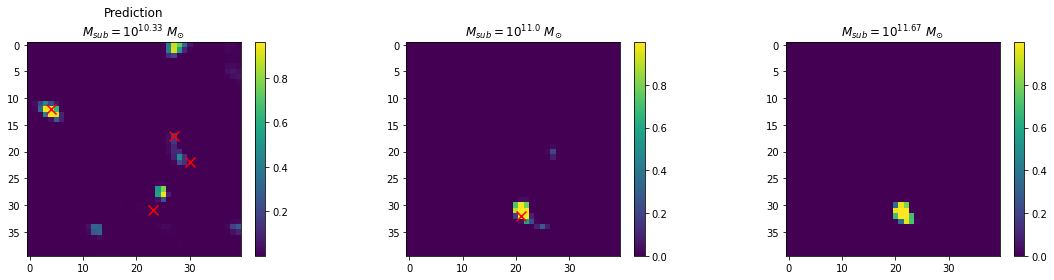

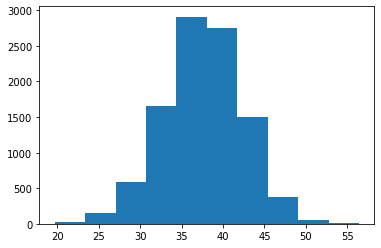

################# UNet_M_m1_nsub3_nsim25000_nmbins4_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


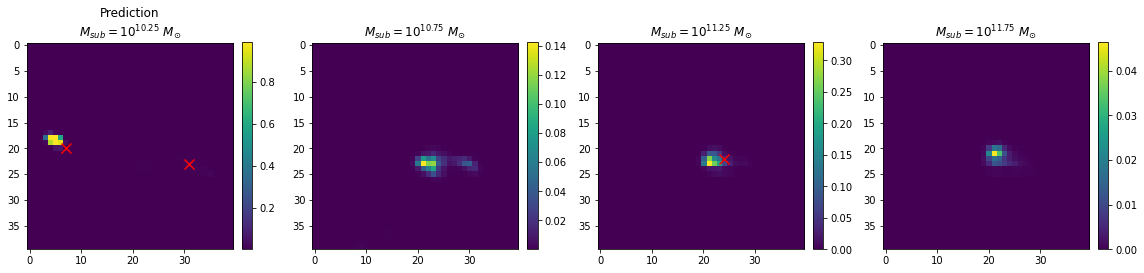

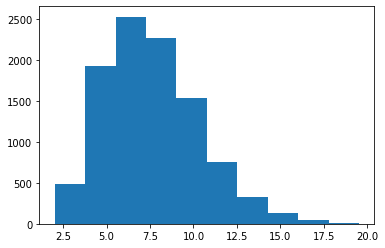

################# UNet_M_m1_nsub1_nsim25000_nmbins1_lr-3.0_fac-1.0_pat5_nobs5000_PREDS.npy ####################


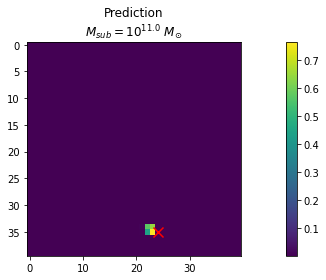

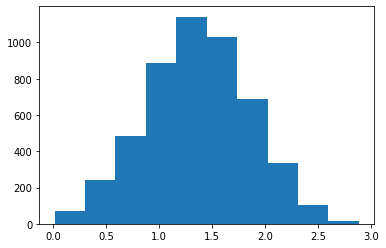

################# UNet_M_m1_nsub10_nsim100000_nmbins5_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy ####################


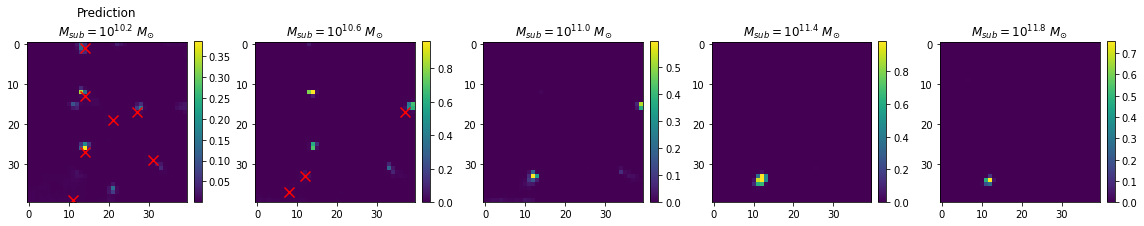

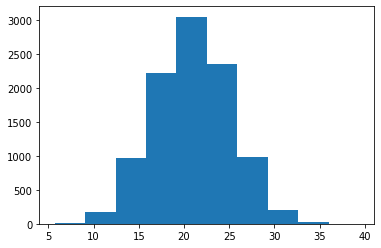

In [241]:
for key in keys:
# for key in [keys[0]]:
    
    name = key
    posts   = preds[key]['posts']
    targets = preds[key]['targets']
    inds    = preds[key]['inds']
    obs0s   = preds[key]['obs0s']
    
    print(f'################# {name} ####################')
    
    
    n_obs = len(posts)

    
#     post = posts[0]
    
    nmbins = posts.shape[1]
    m = np.logspace(10, 12, 2*nmbins+1)
    m_centers, m_edges = m[1::2], m[0::2]
    m_titles = [rf'$M_{{sub}} = 10^{ {np.round(m, 2)} }\ M_{{\odot}}$' for m in np.log10(m_centers)]
    
    for i in np.random.randint(0, n_obs, 1):
        target_coords = np.array(np.where(targets[i] == 1)).T
        plt_imshow(posts[i], target_coords = target_coords, titles = get_title('Prediction', m_titles), y = 4, cbar = True, tl = True)
       
    

    
#     nsim = np.sum(targets, axis = (1, 2, 3)).max()
    
                    
    plt.hist( np.sum(posts, axis = (1, 2, 3)) )
#     plt.title(name)
    plt.show()
    

UNet_M_m1_nsub5_nsim50000_nmbins3_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy


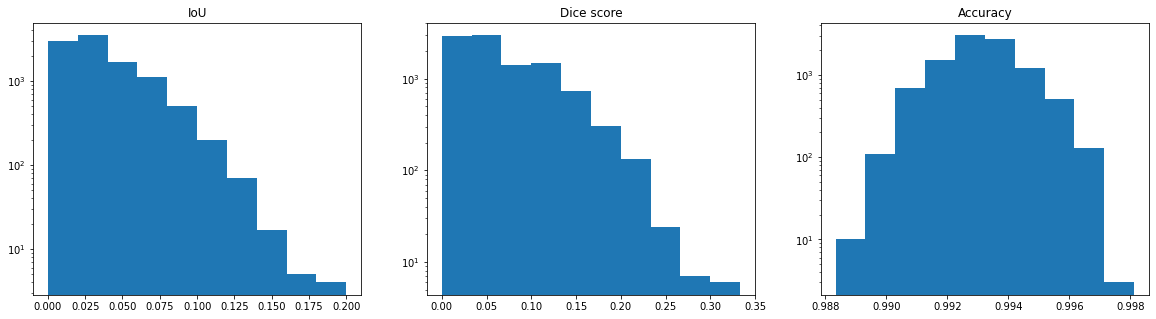

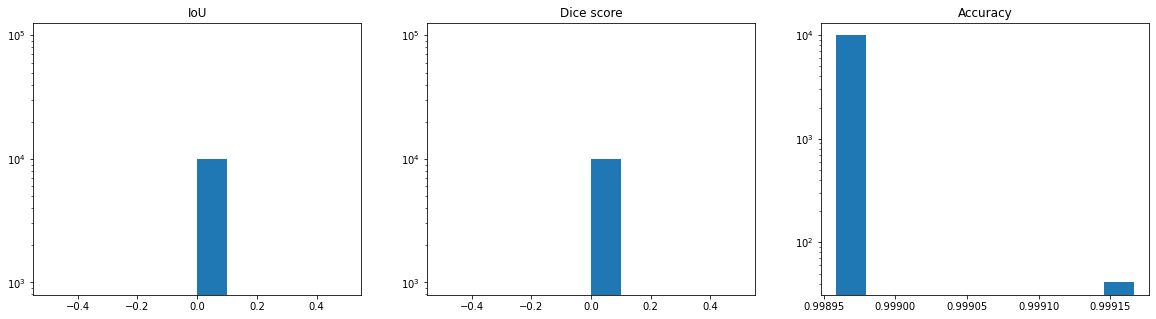

UNet_M_m1_nsub3_nsim25000_nmbins4_lr-3.0_fac-1.0_pat5_nobs10000_PREDS.npy


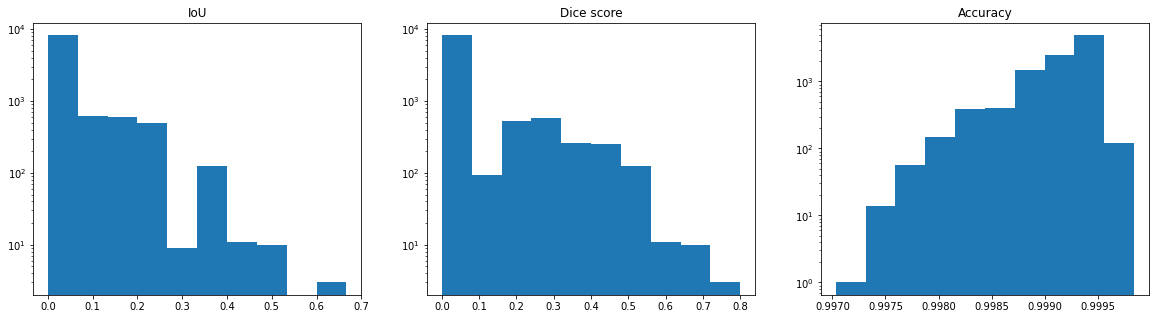

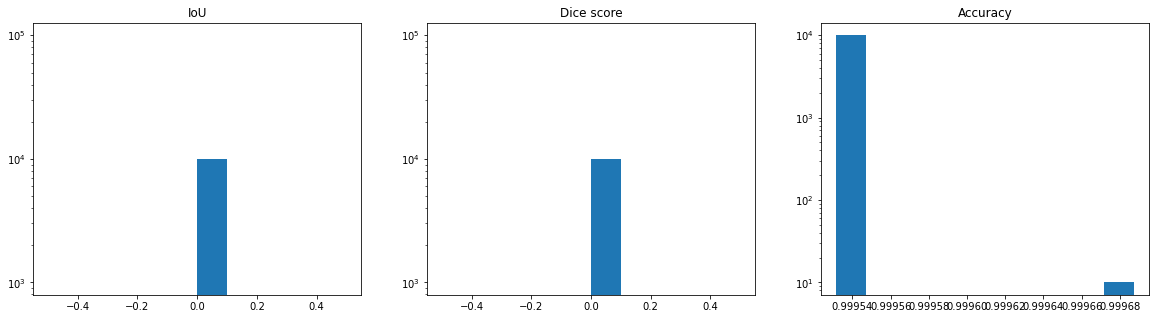

UNet_M_m1_nsub1_nsim25000_nmbins1_lr-3.0_fac-1.0_pat5_nobs5000_PREDS.npy


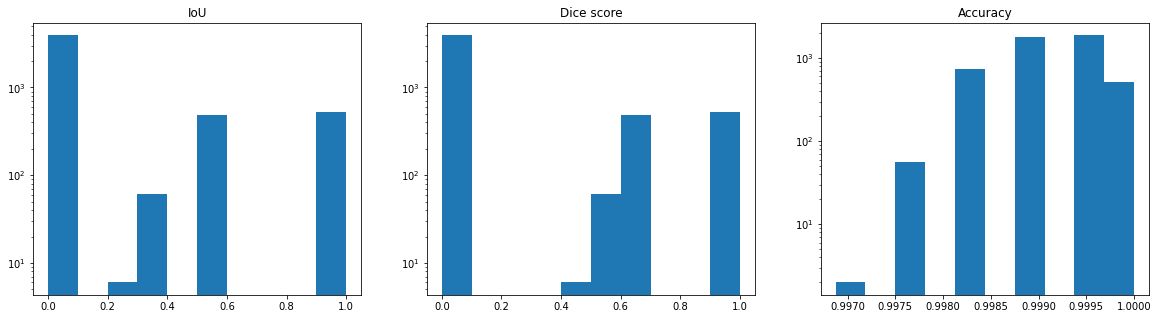

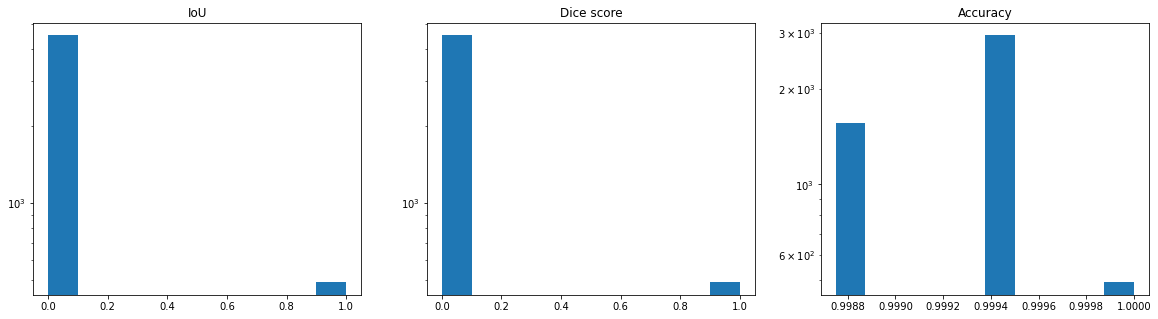

In [192]:
for key in keys:
# for key in [keys[0]]:
    
    name = key
    posts   = preds[key]['posts']
    targets = preds[key]['targets']
    inds    = preds[key]['inds']
    obs0s   = preds[key]['obs0s']
    
    print(name)
    
    posts_sum = np.array([np.full((posts[0].shape), fill_value) for fill_value in np.sum(posts, axis = (1, 2, 3))])
    posts_norm = posts / posts_sum
    
    


#     fig, axs = plt.subplots(1, 2, figsize = (20, 5))

#     axs[0].hist(posts_norm.flatten())
#     axs[1].hist(np.round(posts_norm.flatten()))
    
#     for ax in axs:
#         ax.set_yscale('log')
#     plt.show()
    
    for p in [posts, posts_norm]:
        metrics = iou, dice, acc = get_metrics(np.round(p), targets)
        fig, axs = plt.subplots(1, len(metrics), figsize = (20, 5))

        for ax, metric, title in zip(axs, metrics, ['IoU', 'Dice score', 'Accuracy']):
            ax.hist(metric)
            ax.set_title(title)
            ax.set_yscale('log')
            
        plt.show()
    
    
#     plt_imshow(posts_norm[0], cbar = True, y = 4)
#     plt_imshow(post, cbar = True, y = 4)
    
#     plt_imshow(np.round(post), y = 4)
#     plt_imshow(targets[0], y = 4)

In [180]:
def get_metrics(p: np.array, t: np.array):
    """
    size: BATCH x NMBINS x L X L
    """    
    if not len(p.shape) == 4:
        raise ValueError('shape not correct')
        
    intersection = np.logical_and(p, t).sum((1,2,3))
    union = np.logical_or(p, t).sum((1,2,3))
    
    iou  = intersection / union
    dice = (2*intersection)/(union + intersection)
    acc = (p == t).sum((1,2,3)) / p[0].size
    
    return iou, dice, acc

metrics = iou, dice, acc = get_metrics(p, t)

In [181]:
metrics

(array([0.02941176, 0.02439024, 0.07142857, ..., 0.        , 0.02857143,
        0.        ]),
 array([0.05714286, 0.04761905, 0.13333333, ..., 0.        , 0.05555556,
        0.        ]),
 array([0.993125  , 0.99166667, 0.991875  , ..., 0.99270833, 0.99291667,
        0.99166667]))

In [ ]:
OVERWRITE = False
preds_name = f'../data/preds/{mre_name[:-3]}_nobs{n_obs}_PREDS.npy'

if OVERWRITE is True or not os.path.exists(preds_name):
    for i in tqdm(range(n_obs)): # loop over number of observations we will take into account
        post, target_coords, target_coords_alt, scatter, scatter_alt, obs0_i, obs0, [x,y,m], posts_all, target, obs0_i = get_pred()
        posts[i], targets[i] = post, target
        inds[i] = obs0_i
        obs0s[i] = obs0['image'].squeeze().numpy()

    with open(preds_name, 'wb') as f:
        np.save(f, posts)
        np.save(f, targets)
        np.save(f, inds)
        np.save(f, obs0s)

else:
    with open(preds_name, 'rb') as f:
        posts   = np.load(f)
        targets = np.load(f)
        inds    = np.load(f)
        obs0s   = np.load(f)